In [64]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


1. Loading the data

In [65]:
data = pd.read_csv("/Users/surajkwork/Documents/Projects/ab-testing/marketing-campaign.csv")
data.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [66]:
data.shape

(548, 7)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


No null values. 

In [68]:
data.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [69]:
for column in data.columns:
    print(f" No. of unique values for {column}: {data[column].nunique()}")

 No. of unique values for MarketID: 10
 No. of unique values for MarketSize: 3
 No. of unique values for LocationID: 137
 No. of unique values for AgeOfStore: 25
 No. of unique values for Promotion: 3
 No. of unique values for week: 4
 No. of unique values for SalesInThousands: 517


2. Exploration

Checking sales distribution across promotions.

In [70]:
sales = data.groupby('Promotion')['SalesInThousands'].sum().reset_index()
sales['Percentage'] = round((sales['SalesInThousands'] / sales['SalesInThousands'].sum()) * 100)


In [71]:
sales

,Promotion,SalesInThousands,Percentage
0,1,9993.03,34.0
1,2,8897.93,30.0
2,3,10408.52,36.0


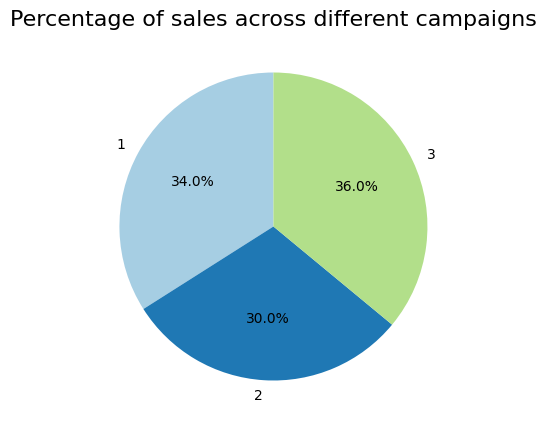

In [72]:
fig, ax = plt.subplots(figsize=(5, 5))   
ax.pie(sales['Percentage'], labels=sales['Promotion'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax.set_title("Percentage of sales across different campaigns", fontsize=16)
plt.show()

All 3 promotion groups contribute to the sales roughly equally although Promotion group 3 results in largest sales amount.

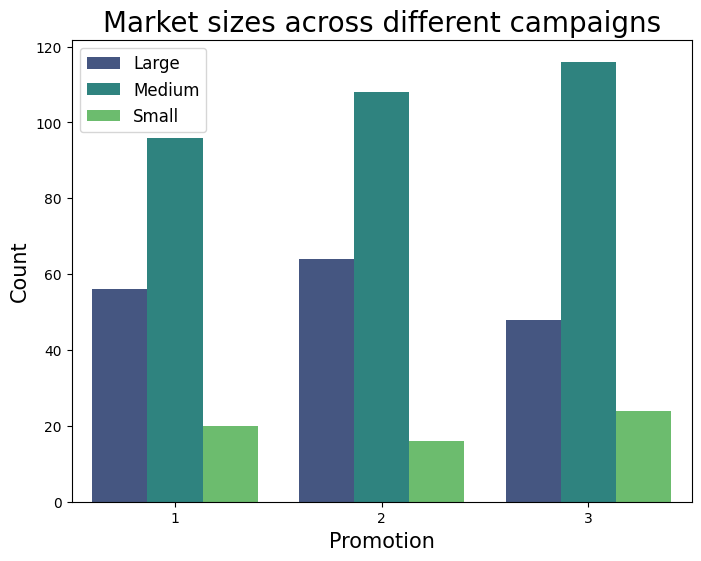

In [73]:
Market = data.groupby(['Promotion', 'MarketSize']).size().reset_index(name='Count')

# Visualizing data
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.barplot(x='Promotion', y='Count', hue='MarketSize', data=Market, palette='viridis')
plt.xlabel("Promotion", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Market sizes across different campaigns", fontsize=20)
plt.legend(title='', fontsize=12)
plt.show()

All 3 promotions ran more in Medium sized markets, followed by Large sized markets and then Small sized markets.  

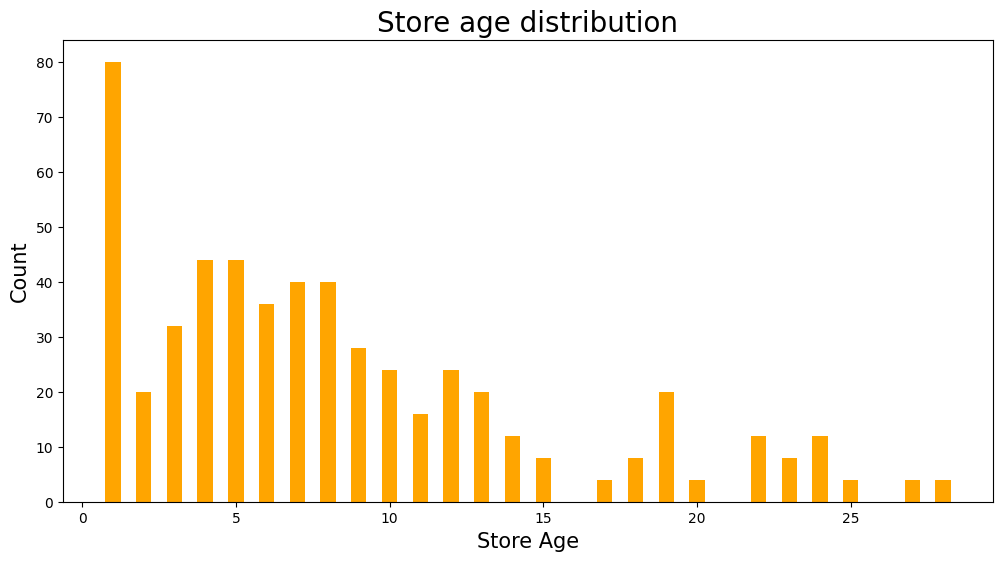

In [74]:
Age = data.groupby('AgeOfStore').size().reset_index(name='Count')

# Visualizing data
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(Age['AgeOfStore'], Age['Count'], width=0.5, color='orange')
plt.xlabel("Store Age", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Store age distribution", fontsize=20)
plt.show()

In [75]:
data.groupby('Promotion')['AgeOfStore'].apply(lambda x: x.describe())

Promotion       
1          count    172.000000
           mean       8.279070
           std        6.636160
           min        1.000000
           25%        3.000000
           50%        6.000000
           75%       12.000000
           max       27.000000
2          count    188.000000
           mean       7.978723
           std        6.597648
           min        1.000000
           25%        3.000000
           50%        7.000000
           75%       10.000000
           max       28.000000
3          count    188.000000
           mean       9.234043
           std        6.651646
           min        1.000000
           25%        5.000000
           50%        8.000000
           75%       12.000000
           max       24.000000
Name: AgeOfStore, dtype: float64

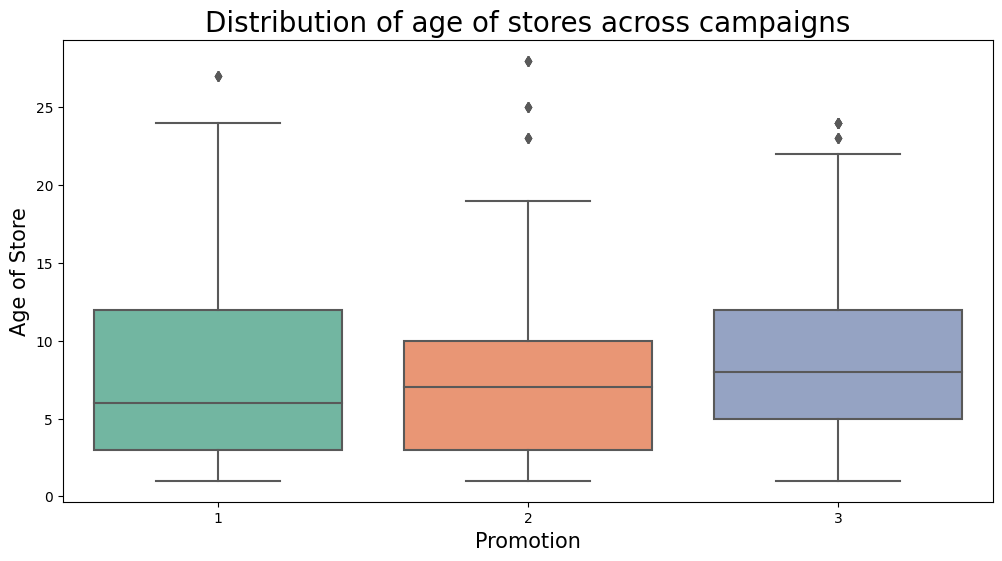

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promotion', y='AgeOfStore', data=data, palette='Set2')
plt.xlabel("Promotion", fontsize=15)
plt.ylabel("Age of Store", fontsize=15)
plt.title("Distribution of age of stores across campaigns", fontsize=20)
plt.show()

3. T-test to check for statistical signifance

a. Manually calculating t-test statistics

In [77]:
# Get the sales values for each campaign 

promo_1 = data[data['Promotion'] == 1]['SalesInThousands']
promo_2 = data[data['Promotion'] == 2]['SalesInThousands']
promo_3 = data[data['Promotion'] == 3]['SalesInThousands']

In [78]:
# Average out the sales per each campaign 

mean_1 = np.mean(promo_1)
mean_2 = np.mean(promo_2)
mean_3 = np.mean(promo_3)

In [79]:
# get the standard deviation for each 
std_1 = np.std(promo_1, ddof=1)   
std_2 = np.std(promo_2, ddof=1)
std_3 = np.std(promo_3, ddof=1)

In [80]:
# Get the no. of observations in each 
n_1 = len(promo_1)
n_2 = len(promo_2)
n_3 = len(promo_3)

In [81]:
# Manually calculate t-value and p-value for difference between campaigns 1 and 2 first 

t_value = (mean_1 - mean_2) / np.sqrt((std_1**2 / n_1) + (std_2**2 / n_2))
df_1_2 = n_1 + n_2 - 2
p_value = 2 * stats.t.cdf(-abs(t_value), df=df_1_2)
print(f"t-value: {t_value}")
print(f"p_value: {p_value}")

t-value: 6.42752867090748
p_value: 4.1432972177084283e-10


t-value of 6.4275 and p-value of 4.143e-10 (less than 0.05) suggest that the null hypothesis (no difference between the 2 campaigns) can be rejected and that the difference between campaigns is significant.

In [82]:
# Manually calculate t-value comparing campaigns 1 and 3 next 

t_value = (mean_1 - mean_3) / np.sqrt((std_1**2 / n_1) + (std_3**2 / n_3))

 
df_1_3 = n_1 + n_3 - 2
 
p_value = 2 * stats.t.cdf(-abs(t_value), df=df_1_3)

 
print(f"t-value: {t_value}")
print(f"p_value: {p_value}")
 

t-value: 1.5560224307758632
p_value: 0.12058631176434825


t-value of 1.5560 and the p-value of 0.1205 (greater than 0.05) shows that there is no significant difference between campaigns 1 and 3. 

Using scipy.stats package:

In [24]:
# T-test between promo_1 and promo_2
t_test_1_2 = stats.ttest_ind(promo_1, promo_2, equal_var=False)  # Use equal_var=False if variances are assumed unequal

# T-test between promo_1 and promo_3
t_test_1_3 = stats.ttest_ind(promo_1, promo_3, equal_var=False)

# Printing the t-test results
print(t_test_1_2)
print(t_test_1_3)

Ttest_indResult(statistic=6.42752867090748, pvalue=4.2903687179871785e-10)
Ttest_indResult(statistic=1.5560224307758634, pvalue=0.1205914774222948)


Using the t.test from the scipy.stats package we get the same results for the comparison between campaigns 1 and 2 and campaigns 1 and 3. 


Thus, campaigns 1 and 2 are better than 3 and either of those can be used for driving sales. 